In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import ast

import numpy as np
import pandas as pd

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter


In [4]:
merge_df = pd.read_csv("/disk2/fli/SSMuLA/results/corr_3_all/384/boosting|ridge-top96/actcut-1/merge_all_0.125.csv")
merge_df = merge_df.sort_values("lib")
merge_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top96_SSM_numb_path,numb_loc_opt_norm_cannot_escape,frac_loc_opt_norm_cannot_escape,norm_non-magnitude,norm_reciprocal-sign
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,1.000000,1.000000,1.000000,1.000000,0.632319,854,1.0,0.000125,4.465397,0.205829
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,1.000000,1.000000,1.000000,1.000000,0.025040,34545,2.0,0.000013,9.278868,1.678579
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,1.000000,1.000000,1.000000,1.000000,0.722639,6533,1.0,0.000127,28.445324,5.735556
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,1.000000,1.000000,1.000000,1.000000,0.178532,7248,1.0,0.000127,28.665219,5.172631
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,0.817149,0.772854,0.817149,0.772854,0.017094,234,4.0,0.000595,1.809783,0.547083
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,0.943851,1.000000,0.829413,0.810121,0.003395,18262,23.0,0.000145,6.438395,2.381029
6,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.428916,0.230815,0.428916,0.230815,0.288136,59,3.0,0.000376,0.446493,0.164719
7,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.274086,0.127970,0.274086,0.127970,0.166667,18,3.0,0.000375,0.122204,0.057886
8,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.379468,0.315253,0.379468,0.315253,0.114286,35,4.0,0.000500,0.259397,0.101303
9,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,1.000000,1.000000,0.996377,1.000000,0.393602,719,3.0,0.000386,4.588191,1.260749


In [5]:
corr_df = pd.read_csv('/disk2/fli/SSMuLA/results/corr_3_all/384/boosting|ridge-top96/actcut-1/corr_0.125.csv')
corr_df

,descriptor,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,parent_rank_percent,...,delta_ft_top96_SSM,delta_ft-comb_recomb_SSM,delta_ft-comb_single_step_DE,delta_ft-comb_top96_SSM,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,n_site,1.000000,0.753937,0.083771,0.752618,0.139374,-0.362372,-0.529620,0.752618,0.362372,...,0.083624,0.195123,0.027875,0.083624,-0.641119,-0.641119,-0.529620,-0.641119,-0.641119,-0.529620
1,numb_measured,0.753937,1.000000,0.663158,0.626971,0.178634,-0.451840,-0.507882,0.609458,0.315237,...,-0.010508,0.157618,-0.031524,-0.010508,-0.259195,-0.283713,-0.122592,-0.259195,-0.283713,-0.122592
2,percent_measured,0.083771,0.663158,1.000000,0.073555,-0.003503,-0.164624,-0.094571,0.056042,-0.021016,...,-0.199650,-0.052539,-0.157618,-0.199650,0.189142,0.192645,0.213661,0.189142,0.192645,0.213661
3,numb_active,0.752618,0.626971,0.073555,1.000000,0.748252,-0.643357,-0.391608,0.685315,0.440559,...,-0.419580,-0.293706,-0.496503,-0.419580,-0.202797,-0.398601,-0.251748,-0.202797,-0.398601,-0.251748
4,percent_active,0.139374,0.178634,-0.003503,0.748252,1.000000,-0.650350,-0.006993,0.244755,0.251748,...,-0.720280,-0.636364,-0.776224,-0.720280,0.328671,0.048951,0.125874,0.328671,0.048951,0.125874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,single_structnmsa-comb_ndcg,-0.139374,-0.332750,-0.220666,0.174825,0.461538,-0.293706,0.552448,-0.272727,-0.328671,...,-0.755245,-0.804196,-0.748252,-0.755245,0.020979,-0.230769,-0.237762,0.020979,-0.230769,-0.237762
137,single_structnmsa-comb_rocauc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,single_two-best_rho,0.362372,0.588442,0.315237,0.321678,0.195804,-0.461538,-0.300699,0.272727,0.160839,...,0.069930,0.181818,0.090909,0.069930,-0.174825,-0.062937,-0.076923,-0.174825,-0.062937,-0.076923
139,single_two-best_ndcg,-0.250873,-0.031524,0.325745,0.195804,0.566434,-0.419580,0.377622,-0.286713,-0.230769,...,-0.720280,-0.748252,-0.720280,-0.720280,0.279720,0.104895,0.048951,0.279720,0.104895,0.048951


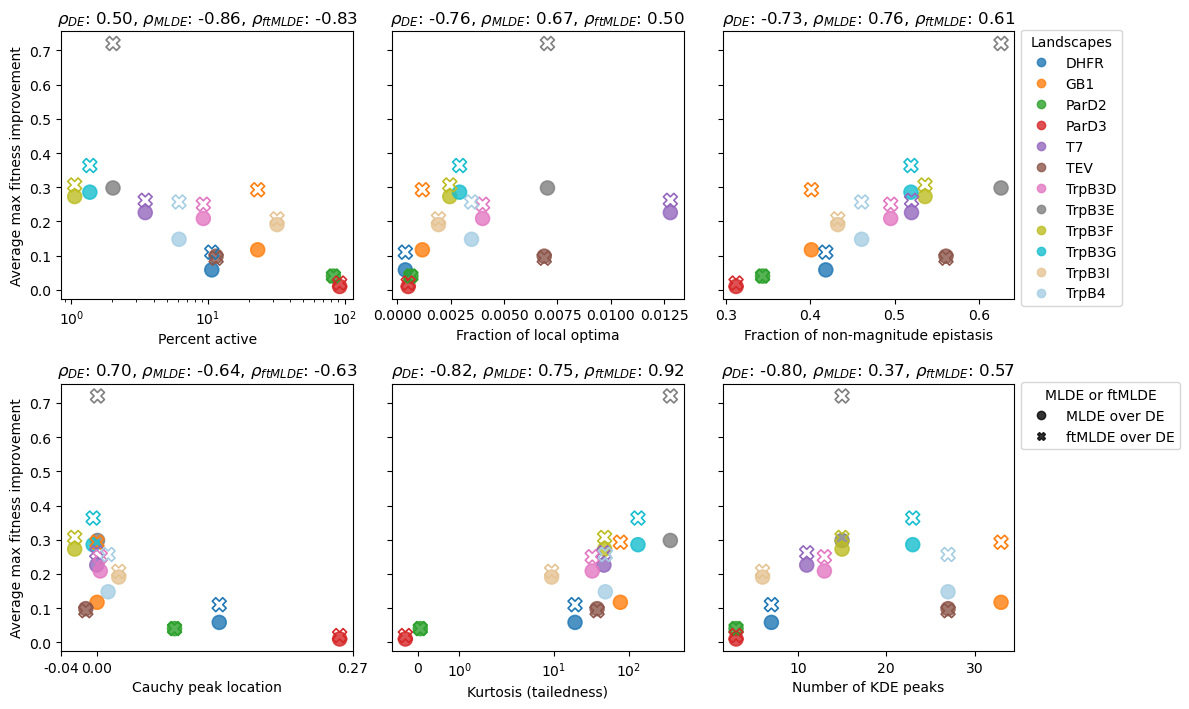

In [7]:
# merge_df = merge_df.set_index("lib")
pooled_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_coves",
        "top_maxes_double",
    ]
].max(axis=1, skipna=True)
# ].max(axis=1)

fig, ax = plt.subplots(2, 3, figsize=(12, 7.2), sharey=True)

y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
y2 = pooled_ft.to_list() - merge_df["single_step_DE_mean_all"]
clist = sns.color_palette("tab10").as_hex() + ['#e5c494', '#a6cee3']
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# Scatter plot on the first axes
# ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)


# Scatter plot on the second axes
ax[0, 0].scatter(merge_df["percent_active"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[0, 0].scatter(
    merge_df["percent_active"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 0].set_xscale("log")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[0, 0].set_xlabel("Percent active")

ax[0, 0].set_ylabel("Average max fitness improvement")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[0, 0].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="percent_active"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["percent_active"])[0],
        spearmanr(y2, merge_df["percent_active"])[0],
    )
)

# Scatter plot on the third axes
ax[0, 1].scatter(merge_df["frac_loc_opt_total"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[0, 1].scatter(
    merge_df["frac_loc_opt_total"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[0, 1].set_xlabel("Fraction of local optima")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[0, 1].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="frac_loc_opt_total"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["frac_loc_opt_total"])[0],
        spearmanr(y2, merge_df["frac_loc_opt_total"])[0],
    )
)

ax[0, 2].scatter(
    merge_df["fraction_non-magnitude"], y, c=clist, s=100, alpha=0.8, linewidth=1.2
)
ax[0, 2].scatter(
    merge_df["fraction_non-magnitude"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 2].set_xlabel("Fraction of non-magnitude epistasis")
ax[0, 2].set_title(
    # de rho corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0]
    # r'$\rho_{sub} = \frac{\alpha_{i}}{\beta^{2}_{i+1}}$ for $i = 1, 2, 3$'
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["fraction_non-magnitude"])[0],
        spearmanr(y2, merge_df["fraction_non-magnitude"])[0],
    )
)


# Scatter plot on the second axes
ax[1, 0].scatter(merge_df["loc"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[1, 0].scatter(
    merge_df["loc"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 0].set_xscale("symlog")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[1, 0].set_xlabel("Cauchy peak location")
ax[1, 0].set_ylabel("Average max fitness improvement")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[1, 0].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="loc"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["loc"])[0],
        spearmanr(y2, merge_df["loc"])[0],
    )
)
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax[1, 1].scatter(
    merge_df["kurt"], y, c=clist, s=100, alpha=0.8, linewidth=1.2
)
ax[1, 1].scatter(
    merge_df["kurt"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 1].set_xlabel("Kurtosis (tailedness)")
ax[1, 1].set_xscale("symlog")
ax[1, 1].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="kurt"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["kurt"])[0],
        spearmanr(y2, merge_df["kurt"])[0],
    )
)

# Scatter plot on the third axes
ax[1, 2].scatter(merge_df["numb_kde_peak"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[1, 2].scatter(
    merge_df["numb_kde_peak"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[1, 2].set_xlabel("Number of KDE peaks")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[1, 2].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="numb_kde_peak"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["numb_kde_peak"])[0],
        spearmanr(y2, merge_df["numb_kde_peak"])[0],
    )
)

legend_list = []  # To store legend handles
legend_list2 = []

for l, lc in zip(merge_df["lib"], clist):
    legend_list.append(
        Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
    )
ax[0, 2].legend(handles=legend_list, loc="upper left",title="Landscapes",bbox_to_anchor=(1, 1.0325))

for marker, label in zip(["o", "X"], ["MLDE", "ftMLDE"]):
    legend_list2.append(
        Line2D(
            [0],
            [0],
            marker=marker,
            linestyle="none",
            color="black",
            alpha=0.8,
            label=f"{label} over DE",
        )
    )
ax[1, 2].legend(handles=legend_list2, loc="upper left",title="MLDE or ftMLDE",bbox_to_anchor=(1, 1.0315))


# ax[2].set_xlabel('MLDE and DE max fitness achieved')
# fig.suptitle(
#     "(ft)MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
#     fontsize=12,
#     fontweight="bold",
#     y=0.975,
# )
# Show plot
plt.tight_layout()
plt.show()